<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1">Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-и-заполнение-пропусков-в-данных" data-toc-modified-id="Исследование-и-заполнение-пропусков-в-данных-2.1">Исследование и заполнение пропусков в данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2">Изменение типов данных</a></span></li></ul></li><li><span><a href="#Подсчёт-и-добавление-данных-в-таблицу" data-toc-modified-id="Подсчёт-и-добавление-данных-в-таблицу-3">Подсчёт и добавление данных в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Исследование-площади,-цены,-числа-комнат,-высоты-потолков-4.1">Исследование площади, цены, числа комнат, высоты потолков</a></span></li><li><span><a href="#Анализ-редких-и-выбивающихся-значений" data-toc-modified-id="Анализ-редких-и-выбивающихся-значений-4.2">Анализ редких и выбивающихся значений</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры-4.3">Исследование факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений-4.4">Анализ десяти населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удалённости-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удалённости-от-центра-4.5">Анализ изменения цены по степени удалённости от центра</a></span></li><li><span><a href="#Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу" data-toc-modified-id="Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу-4.6">Сравнение выводов по квартирам в центре и общих выводов по всему городу</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.7"><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li></ul></div>

# Исследование обьявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Ход исследования**

Исследование пройдёт в пять этапов:

- Обзор данных.
- Предобработка данных.
- Подсчёт и добавление данных в таблицу.
- Исследовательский анализ данных.
- Формулирование общего вывода.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
ads = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
ads.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице двадцать два столбца. Тип данных в столбцах — object, int, float.

Описание данных:

  * `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)
  * `balcony`— число балконов
  * `ceiling_height`— высота потолков (м)
  * `cityCenters_nearest`— расстояние до центра города (м)
  * `days_exposition`— сколько дней было размещено объявление (от публикации до снятия)
  * `first_day_exposition`— дата публикации
  * `floor`— этаж
  * `floors_total`— всего этажей в доме
  * `is_apartment`— апартаменты (булев тип)
  * `kitchen_area`— площадь кухни в квадратных метрах (м²)
  * `last_price`— цена на момент снятия с публикации
  * `living_area`— жилая площадь в квадратных метрах (м²)
  * `locality_name`— название населённого пункта
  * `open_plan`— свободная планировка (булев тип)
  * `parks_around3000`— число парков в радиусе 3 км
  * `parks_nearest`— расстояние до ближайшего парка (м)
  * `ponds_around3000`— число водоёмов в радиусе 3 км
  * `ponds_nearest`— расстояние до ближайшего водоёма (м)
  * `rooms`— число комнат
  * `studio`— квартира-студия (булев тип)
  * `total_area`— площадь квартиры в квадратных метрах (м²)
  * `total_images`— число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

В названиях колонок нарушений стиля нет. Количество значений в столбцах различается. 
Значит, в данных есть пропущенные значения.

**Вывод**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Ввозможная причина пропусков в столбце `is_apartment` следующая: большинство объектов "по определению" не является апартаментами. Люди не видят смысла в заполнении этого поля. Также само поле могло появится недавно, в этом случае в старых объявлениях вообще не было возможности его заполнить.

Для проведения более точного анализа данных нам будет необходимо добавить новые данные в таблицу, используя имеющиеся. 
Поскольку в данных есть пропуски, займемся устранением этой проблемы в первую очередь. 

## Предобработка данных

### Исследование и заполнение пропусков в данных

In [5]:
ads.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно заметить, что во многих столбцах остутствуют значения. Например, если человек не указал число балконов в `balcony` — скорее всего,их нет. Такие пропуски правильно заменить на 0. Тип данных этого столбца верно будет сделать целочисленным.

В колонках `locality_name` и `floors_total` данные восстановить нет возможности, к тому же пропусков немного. Избавимся от ненужных строк. 

In [6]:
ads['balcony'] = ads['balcony'].fillna(0)

In [7]:
ads = ads.dropna(subset = ['locality_name', 'floors_total'])

In [8]:
ads['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В колонке `ceiling_height` присутствуют значения высоты потолка больше 5м. Так же есть пропущенные значения. Вероятно, эти пропуски связаны с тем, что в объявлениях высоту потолков не указывали. Найдем медиану и ею заменим пропуски:

In [9]:
ceiling_median = ads['ceiling_height'].median()
ceiling_median

2.65

In [10]:
ads['ceiling_height'] = ads['ceiling_height'].fillna(ceiling_median)

In [11]:
ads['is_apartment'].unique()

array([nan, False, True], dtype=object)

В столбце `is_apartment` огромное количество пропусков. Предположу, что эти данные многие не указывали в объявлениях. Оставим этот столбец без изменений.

In [12]:
ads['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Пропуски в `days_exposition` предположительно присутствуют оттого, что на момент выгрузки данных объявления по объекту не были сняты с публикации. Рассмотрим его более детально.

In [13]:
# доля пропусков к общему числу данных
ads['days_exposition'].isna().sum() / len(ads)

0.13456397199236156

In [14]:
ads['y'] = pd.to_datetime(ads['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.year

Рассмотрим пропуски в зависимости от года публикации объявления и их соотношение с общим числом данных:

In [15]:
# доля числа пропусков по годам
ads[ads['days_exposition'].isna()].value_counts('y') / len(ads)

y   
2019    0.075875
2018    0.040611
2017    0.011500
2015    0.002971
2016    0.002843
2014    0.000764
dtype: float64

Наименьшая доля пропусков в `days_exposition` наблюдается в объявлениях 2014 года, причем с каждым годом эта доля только растет. В 2019 году более чем у половины объявлений не расчитано количество дней продажи квартиры. Значит можно сказать, что квартиры с пропусками не проданы и объявление не снято. Поэтому заполнение пропусков в данном случае невозможно - они не случайные и существенно влияют на статистику.

In [16]:
ads['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [17]:
ads['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

Пропуски в колонках `kitchen_area`, `living_area` могли появиться по причине изначального отсутствия в объявлении.

In [18]:
ads['cityCenters_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [19]:
ads['cityCenters_nearest'].isna().sum() / len(ads)

0.23343942287290473

Рассмотрим долю пропусков по населенным пунктам относительно общего числа данных. Так же оценим пропуски в объявлениях по Петербургу.

In [20]:
# пропуски расстояния до Петербурга
len(ads[(ads['cityCenters_nearest'].isna()) & (ads['locality_name'] == 'Санкт-Петербург')])

60

In [21]:
ads[ads['cityCenters_nearest'].isna()].value_counts('locality_name') / len(ads)

locality_name
посёлок Мурино                           0.022067
Всеволожск                               0.016889
Гатчина                                  0.013028
деревня Кудрово                          0.012688
Выборг                                   0.010057
                                           ...   
поселок городского типа Большая Ижора    0.000042
поселок Цвылёво                          0.000042
деревня Трубников Бор                    0.000042
поселок Усть-Луга                        0.000042
село Шум                                 0.000042
Length: 345, dtype: float64

In [22]:
# доля числа населенных пунктов к общему количеству данных
ads.value_counts('locality_name') / len(ads)

locality_name
Санкт-Петербург       0.664163
посёлок Мурино        0.022067
посёлок Шушары        0.018629
Всеволожск            0.016889
Пушкин                0.015659
                        ...   
поселок Каложицы      0.000042
поселок Кирпичное     0.000042
поселок Коммунары     0.000042
поселок Коробицыно    0.000042
село Шум              0.000042
Length: 364, dtype: float64

In [23]:
len(ads[(ads['cityCenters_nearest'].isna() == False) & (ads['locality_name'] == 'Всеволожск')])

0

Согласно данным, квартир в Петербурге более 66%, при этом пропусков в столбце немного, всего 60. Что касается остальных насееленных пунктов - для некоторых из них отсутствуют данные расстояния до центра, как, например, в посёлке Мурино или во Всеволжске. Вероятно, они вообще не были вычислены. Обрабатывать пропуски в `cityCenters_nearest` не представляется возможным.

Оставшиеся нетронутыми, картографические данные с наибольшим количеством пропусков оставим без изменений. Поскольку они были заполнены автоматически - их трудно восстановить и заполнить пропуски. Проследим как их отсутствие окажет дальнейшее влияние на анализ.

### Изменение типов данных

Для удобства работы и использования данных, изменим значения числа балконов, количества дней и этажей, цену на целочисленные:

In [24]:
ads['balcony'] = ads['balcony'].astype('int')

In [25]:
ads['floors_total'] = ads['floors_total'].astype('int') 

In [26]:
ads['last_price'] = ads['last_price'].astype('int')

Данные колонки `first_day_exposition` приведет в формат даты:

In [27]:
ads['first_day_exposition'] = pd.to_datetime(ads['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
ads.duplicated().sum()

0

**Выводы:**
Итак, мы заполнили пропуски там, где это было возможно. 
 - пропущенные данные в `locality_name` и `floors_total` были удалены, поскольку это не отразится на анализе; 
 - в `ceiling_height` пропуски заменены медианным значением;
 - пропуски в колонках `kitchen_area`, `living_area` оставлены без именений, в анализе эти данные не пригодятся;
 - в `days_exposition` и `cityCenters_nearest` пропуски оставлены без обработки;

Оставшиеся картографические данные оставлены с пропусками, вдальнейшем проследим последствия их наличия при проведении ислледований.

Кроме того, значения столбцов`balcony`, `floors_total`, `last_price`были изменены на целочисленные, чтобы облегчить дальнейший анализ данных. В колонке `first_day_exposition` данные приведены в формат даты.
Дубликатов данных нет.

## Подсчёт и добавление данных в таблицу

Добавим в таблицу новые колонки с данными: 
    цену квадратного метра;
    день недели, месяц и год публикации объявления;
    этаж квартиры; варианты — первый, последний, другой;
    соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [29]:
# цена за квадратный метр
ads['price_per_sqm'] = ads['last_price'] / ads['total_area']

In [30]:
# день недели публикации
ads['weekday_exposition'] = ads['first_day_exposition'].dt.weekday

In [31]:
# месяц публикации
ads['month_exposition'] = ads['first_day_exposition'].dt.month

In [32]:
# год публикации
ads['year_exposition'] = ads['first_day_exposition'].dt.year

In [33]:
# доля жилой площади
ads['living_ratio'] = ads['living_area'] / ads['total_area']

In [34]:
# соотношение площади кухни к общей
ads['kitchen_ratio'] = ads['kitchen_area']/ ads['total_area']

Создадим функцию записи этажей значениями:

In [35]:
def floors_group(row):
        if row['floor'] == 1:
            return 'первый'
        if row['floors_total'] == row['floor']:
            return 'последний'
        return "другой" 

In [36]:
ads['floor_category'] = ads.apply(floors_group, axis=1)

Колонка `cityCenters_nearest`содержит расстояние до центра в метрах. Создадим новый столбец со значениями расстояния в километрах:

In [37]:
ads['cityCenters_nearest_km'] = (ads['cityCenters_nearest'] / 1000)

Для удобства работы с ценами из `last_price` создадим новый столбец цен в тысячах рублей:

In [38]:
ads['last_price_thous_rub'] = ads['last_price'] / 1000 

**Выводы:**

Для более детального анализа и удобства были созданы новые столбцы с данными, на основе имеющихся.

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

<AxesSubplot:>

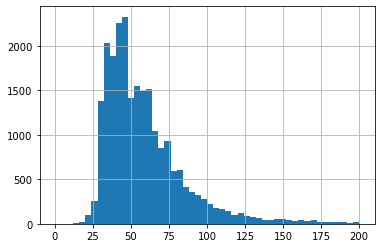

In [39]:
ads['total_area'].hist(bins = 50, range=(0, 200))

Данные столбца близки к нормальному распределению. Большинство квартир в объявлениях имеют площадь до 100 кв.м. Пик значений находится где-то в 40 кв.м. Редки значения более 200 кв.м. Рассмотрим его подробнее:

In [40]:
ads['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Наблюдаем небольшой межквартильный размах, судя по данным чаще всего продаются квартиры площадью чуть больше 200 кв.м. Остальные значения площадей встречаются крайне редко и являются выбросами.

<AxesSubplot:>

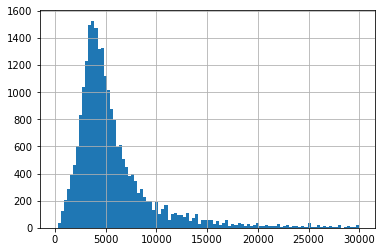

In [41]:
ads['last_price_thous_rub'].hist(bins = 100, range=(0, 30000))

In [42]:
ads['last_price_thous_rub'].median() #большой разброс значений

4646.0

Пик графика в 4 646 тыс.р., большинство цен находится в диапазоне (0, 30 000] тыс.р.

In [43]:
ads['last_price_thous_rub'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price_thous_rub, dtype: float64

Нельзя не заметить большое среднеквадратическое отклонение. Все значения цен более 30 000 тыс руб. встречаются редко и попали в выбросы. Это говорит о том, такие значения цен надо исключить для дальнейшего анализа.

<AxesSubplot:>

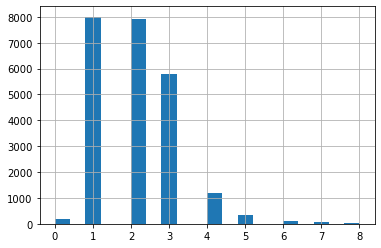

In [44]:
ads['rooms'].hist(bins = 20, range= (0,8))

Заметим, что встречаются объявления с числом комнат 0, вероятно это студии. Наиболее частое значение комнат 1 и 2, реже 3. Большинство квартир в объявлениях имеют 1-5 комнат.

In [45]:
ads['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Данные о квартирах с числом комнат больше 6 редко встречаются в исходном датасете. Из анализа их можно исключить.

<AxesSubplot:>

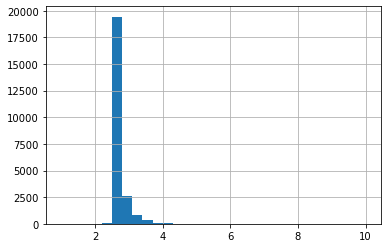

In [46]:
ads['ceiling_height'].hist(bins = 30, range=(1,10))

Судя по графику высота потолков чаще всего находится в диапазоне 2,5 - 3,5 метра, пик по графику 2,7м

In [47]:
ads['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Согласно данным есть квартиры с потолками 100м, что выглядит аномально. Необходимо отбросить все квартиры с потолками выше 3

# Исследование количества времени для продажи квартиры

Исследуем столбец `days_exposition` чтобы понять за какое время производится продажа квартиры, исходя из количества дней размещения объявления.

<AxesSubplot:>

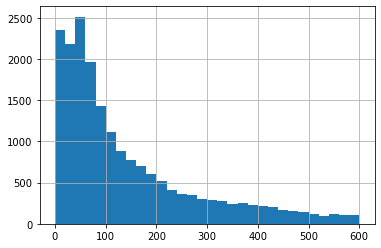

In [48]:
ads['days_exposition'].hist(bins = 30,range= (0, 600))

Наблюдаем на графике высокий пик в 0 и около 50. Слишком быстрые продажи могут вовсе не быть продажами. Объявление могло быть быстро снято с публикации. Для оценки характерных разбросов построим диаграмму размаха:

In [49]:
ads['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

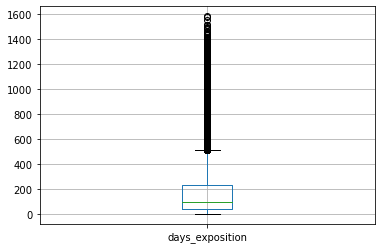

In [50]:
ads.boxplot('days_exposition')

Можно сказать, что быстрые продажи проходят в течение 45 дней со дня публикации. В среднем, объявление снимают с публикации через 231 день. Все значения больше 700 дней - "долгие" продажи, являются выбросами. Медиана далека от этих значений. Выбросы могли появиться из-за того, что после продажи квартиры объявление не было снято с публикации.

In [51]:
ads.sort_values(by ='days_exposition', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,y,price_per_sqm,weekday_exposition,month_exposition,year_exposition,living_ratio,kitchen_ratio,floor_category,cityCenters_nearest_km,last_price_thous_rub
18843,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,NaN,...,2014,72614.107884,0,12,2014,0.568465,0.159751,другой,NaN,3500.000
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,...,2014,364076.784969,1,12,2014,0.608559,0.208768,другой,0.318,34878.556
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,NaN,...,2014,132500.000000,1,12,2014,0.550000,0.187500,другой,17.110,10600.000
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,NaN,...,2014,167085.427136,1,12,2014,0.536432,0.226131,другой,11.096,13300.000
20969,18,13300000,133.00,2015-02-11,4,3.00,5,58.00,2,NaN,...,2015,100000.000000,2,2,2015,0.436090,0.338346,другой,5.032,13300.000
6691,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,NaN,...,2014,102373.196836,4,12,2014,0.435551,0.263146,первый,30.358,4400.000
14093,7,9500000,100.00,2015-02-19,4,3.00,5,76.00,5,NaN,...,2015,95000.000000,3,2,2015,0.760000,0.100000,последний,4.798,9500.000
15313,1,9278000,139.80,2014-12-28,4,2.80,5,NaN,4,NaN,...,2014,66366.237482,6,12,2014,NaN,NaN,другой,35.515,9278.000
19123,9,5990000,82.00,2015-02-19,3,3.00,4,60.00,2,NaN,...,2015,73048.780488,3,2,2015,0.731707,0.097561,другой,34.619,5990.000
11955,4,11400000,76.00,2014-12-09,2,2.65,9,36.00,3,NaN,...,2014,150000.000000,1,12,2014,0.473684,0.184211,другой,11.096,11400.000


Объявления по квартирам, продающимся долго всего были опубликованы в декабре и феврале.

### Анализ редких и выбивающихся значений

Чтобы получить объективные результаты исключаем из анализа данные, где продажи были более 700 дней, площадь более 167 кв.м., высота потолков больше чем 3м и цена более 30 000тыс.р., а комнат более 7.
Получим выборку без аномальных значений:

In [52]:
fast_ads = ads.query('days_exposition < 700 and total_area < 200 and rooms < 7 and ceiling_height <= 3 and last_price_thous_rub <= 30000')
len(fast_ads) / len(ads)

0.7761086356885211

После того, как мы отбросили ненужное, в таблице осталось более 77% данных. Этого достаточно для дальнейшего анализа.

### Исследование факторов, влияющих на стоимость квартиры

Рассмотрим все факторы и определим, какие из них больше всего влияют на стоимость квартиры.
Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.

In [53]:
price_df= fast_ads.loc[:,['last_price_thous_rub', 'total_area', 'rooms', 'cityCenters_nearest_km']]

array([[<AxesSubplot:xlabel='last_price_thous_rub', ylabel='last_price_thous_rub'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price_thous_rub'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price_thous_rub'>,
        <AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price_thous_rub'>],
       [<AxesSubplot:xlabel='last_price_thous_rub', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price_thous_rub', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price_thous_rub', ylabel='cityCenters_nearest_km'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest_km

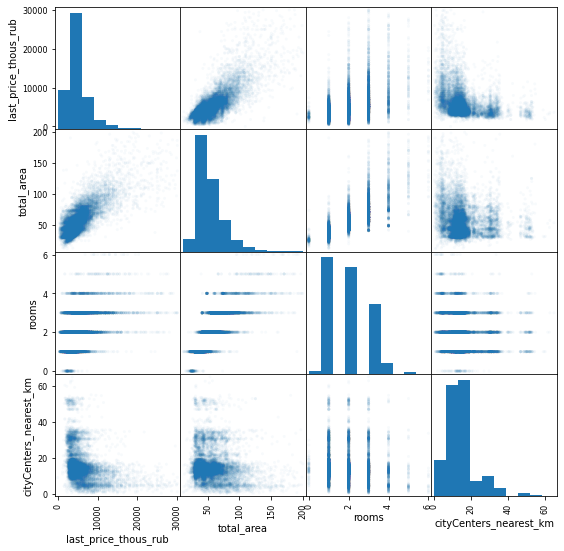

In [54]:
pd.plotting.scatter_matrix(price_df, figsize=(9, 9), alpha=0.03)

На графике зависимости цены от площади прослеживается прямая зависимость, судя по большой частотности данных. С ростом площади более 80 кв.м. эта связь ослабевает.
Зависимость цены от количества комнат по графику слабая, в среднем больше продается квартир с 1-3 комнатами. 
В зависимости от увеличения расстояния цена уменьшается и плотность распределения тоже. Можно заметить, что объявлений с расстоянием до 20 км существенно больше, чем остальных. Так же, квартиры, удаленностью до 20 км стоят дороже. Значит, ближе к центру цена квартиры увеличивается.
Рассмотрим корреляцию значений между собой:

In [55]:
price_df.corr()

,last_price_thous_rub,total_area,rooms,cityCenters_nearest_km
last_price_thous_rub,1.000000,0.765589,0.469002,-0.312593
total_area,0.765589,1.000000,0.787751,-0.157920
rooms,0.469002,0.787751,1.000000,-0.099678
cityCenters_nearest_km,-0.312593,-0.157920,-0.099678,1.000000


Как и следовало ожидать, между ценой и площадью существует тесная связь, чего не скажешь о количестве комнат. Как мы уже увидели по графику, корреляция роста цены и расстояния обратная, т.е. ближе к центру недвижимость дорожает.



Теперь изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [56]:
floor_stat = fast_ads.pivot_table(index = 'floor_category', values = ['last_price_thous_rub'], aggfunc = 'mean')
floor_stat

,last_price_thous_rub
floor_category,
другой,5380.944820
первый,4119.407411
последний,4847.791740


<AxesSubplot:xlabel='floor_category'>

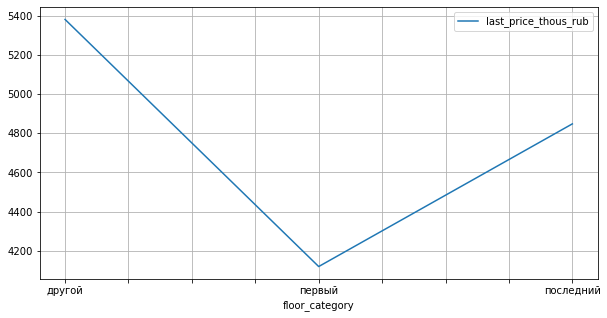

In [57]:
floor_stat.plot(grid=True, figsize=(10, 5))

Как и следовало ожидать, дешевле всего стоят квартиры на первом этаже. Дороже всего обходится покупка квартиры категории "другой".

Далее изучим зависимость цен от даты, года и дня недели:

In [58]:
date_stat = fast_ads.loc[:, ['price_per_sqm', 'weekday_exposition', 'year_exposition', 'month_exposition']]

array([[<AxesSubplot:xlabel='price_per_sqm', ylabel='price_per_sqm'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='price_per_sqm'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='price_per_sqm'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='price_per_sqm'>],
       [<AxesSubplot:xlabel='price_per_sqm', ylabel='weekday_exposition'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='weekday_exposition'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='weekday_exposition'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='weekday_exposition'>],
       [<AxesSubplot:xlabel='price_per_sqm', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='year_exposition'>],
       [<AxesSubplot:xlabel='price_per_sqm', ylabel='month_exposition'>,
        <AxesSubplot:xlabe

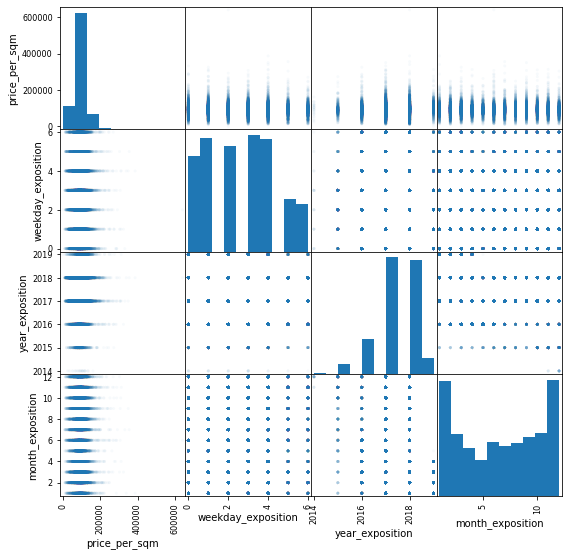

In [59]:
pd.plotting.scatter_matrix(date_stat, figsize=(9, 9), alpha=0.03)

In [60]:
date_stat.corr()

,price_per_sqm,weekday_exposition,year_exposition,month_exposition
price_per_sqm,1.000000,-0.005939,0.056144,0.001188
weekday_exposition,-0.005939,1.000000,0.001191,0.010577
year_exposition,0.056144,0.001191,1.000000,-0.218353
month_exposition,0.001188,0.010577,-0.218353,1.000000


Изучая зависимость от даты размещения: дня недели, месяца и года отметим слабую корреляцию по всем параметрам. Можно заметить, что с каждым годом квартиры становятся дороже. Выше всего они стоили в 2018 году.
Наименьшая стоимость квартир в объявлениях, публикуемых в субботу и  воскресенье, больше - в пятницу. Квартиры, выставленные на продажу в декабре и январе - самые дорогие, самые дешевые - в мае.

**Выводы**

Изучая зависимость цены от различных показателей было замечено, что:
* дороже всего обходится покупка квартиры категории "другой";
* больше всего цена зависит от общей площади квартиры;
* с приближение к центру недвижимость поднимается в цене;
* касательно этажности квартир - в основном квартиры на верхнем и нижнем этажах имеют ряд недостатков, оттого их стоимость ниже.

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Создадим переменную, хранящую информацию о городах и общем количестве объявлений по ним. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [61]:
local_stat = fast_ads.pivot_table(index='locality_name', values = 'price_per_sqm', aggfunc = ['count', 'mean'])

In [62]:
#переименуем колонки
local_stat.columns = ['count', 'mean']

In [63]:
# топ 10 по стоимости кв.м.
local_stat.sort_values(by = 'count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,11820,107294.486445
посёлок Мурино,495,85806.723267
посёлок Шушары,394,77837.057570
Всеволожск,322,68638.704856
Колпино,293,74787.362825
посёлок Парголово,293,89485.413123
деревня Кудрово,280,92614.779090
Пушкин,280,100926.308388
Гатчина,248,68018.259123


Таким образом, больше всего объявлений публикуется по г. Санкт-Петербург, где самая высокая цена за квадратный метр - 107 300. Дешевле всего из данной десятки стоит жилье в Выборге.

### Анализ изменения цены по степени удалённости от центра

 Теперь проведем анализ изменения цены в зависимости от удаленности от центра города.

In [64]:
spb_ads = fast_ads.query('locality_name == "Санкт-Петербург"')

In [65]:
spb_ads['cityCenters_nearest_km'].sort_values().unique()

array([ 0.399,  0.467,  0.472, ..., 28.644, 29.493,    nan])

In [66]:
spb_ads['cityCenters_nearest_km'] = spb_ads['cityCenters_nearest_km'].fillna(60).astype('int')

/var/folders/jp/ct7dkc2s6952v6p0sr1zj2400000gp/T/ipykernel_1448/1258679643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_ads['cityCenters_nearest_km'] = spb_ads['cityCenters_nearest_km'].fillna(60).astype('int')


<AxesSubplot:xlabel='Удаленность', ylabel='Общая стоимость(тыс.р)'>

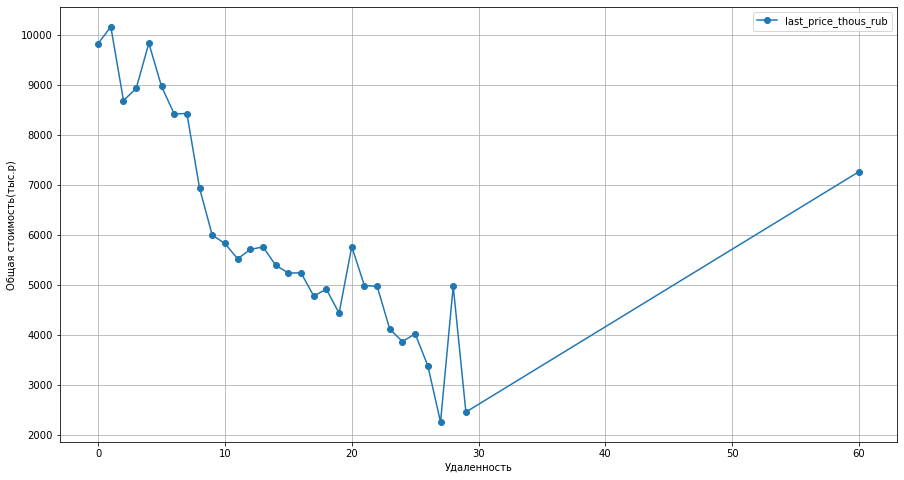

In [67]:
(
    spb_ads.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price_thous_rub', aggfunc = 'mean')
    .plot(grid = True,  style = 'o-', figsize=(15, 8), xlabel = 'Удаленность', ylabel = 'Общая стоимость(тыс.р)')
)

На данном графике отмечается изменение тенденции ценообразования резким падение после 7 км и резким ростом при удаленности на 20 км. В точке отдаленности 60км лежат пропущенные значения.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир, находящихся в центре Петербурга

In [68]:
spb_center_ads = spb_ads.query('cityCenters_nearest_km < 8')

Для этой территории изучим следующие параметры: площадь, цена, число комнат, высота потолков:

<AxesSubplot:>

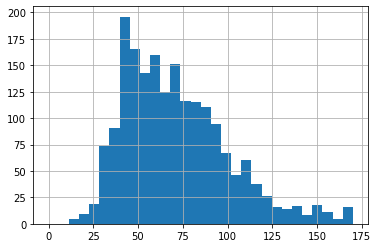

In [69]:
spb_center_ads['total_area'].hist(bins = 30, range=(0, 170))

Наблюдаем пик значения 48 кв.м., площади ограничены 170 кв.м.

<AxesSubplot:>

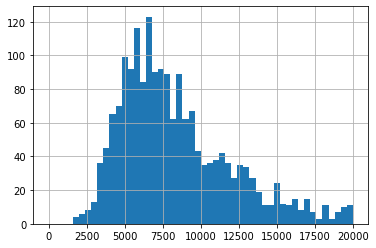

In [70]:
spb_center_ads['last_price_thous_rub'].hist(bins = 50, range=(0, 20000))

Для квартир в центре характерная цена квартиры составляет 7 000 тыс.р, максимальная 30 000тыс.р.

<AxesSubplot:>

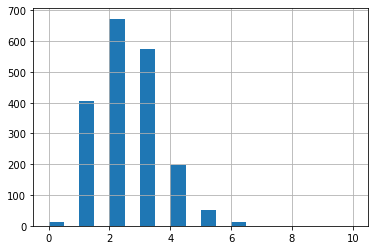

In [71]:
spb_center_ads['rooms'].hist(bins = 20, range=(0, 10))

В центре, согласно графику, больше всего квартир с двумя комнатами, реже с одной и тремя.

<AxesSubplot:>

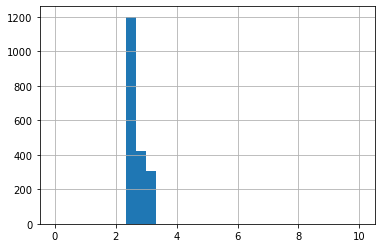

In [72]:
spb_center_ads['ceiling_height'].hist(bins = 30, range=(0, 10))

In [73]:
spb_center_ads['ceiling_height'].mean()

2.7254380508035085

Максимальная частая высота потолка составила 2,73 м.


Проанализируем зависимость от этажности квартир:


In [74]:
floor_center_stat = spb_center_ads.pivot_table(index = 'floor_category', values = ['last_price_thous_rub'], aggfunc = 'mean')
floor_center_stat

,last_price_thous_rub
floor_category,
другой,9487.580636
первый,6552.261809
последний,9074.889197


In [75]:
# по всем квартирам
floor_stat

,last_price_thous_rub
floor_category,
другой,5380.944820
первый,4119.407411
последний,4847.791740


Взаимосвязь цены и этажности сохраняется - дороже квартиры, находящиеся ни на первом, ни на последнем этажах.

In [76]:
date_center_stat = spb_center_ads.loc[:, ['last_price_thous_rub', 'weekday_exposition', 'year_exposition', 'month_exposition']]

array([[<AxesSubplot:xlabel='last_price_thous_rub', ylabel='last_price_thous_rub'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='last_price_thous_rub'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='last_price_thous_rub'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='last_price_thous_rub'>],
       [<AxesSubplot:xlabel='last_price_thous_rub', ylabel='weekday_exposition'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='weekday_exposition'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='weekday_exposition'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='weekday_exposition'>],
       [<AxesSubplot:xlabel='last_price_thous_rub', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='year_exposition'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='year_exposition'>],
       [<AxesSubplot:xlabel='last_price_thous_rub'

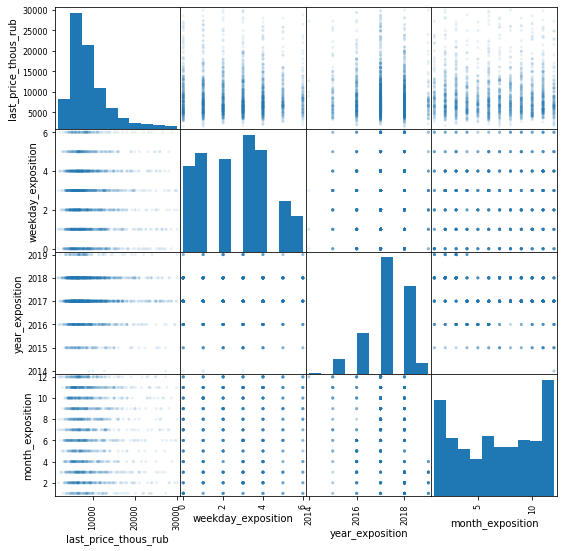

In [77]:
pd.plotting.scatter_matrix(date_center_stat, figsize=(9, 9), alpha=0.1)

Изучая зависимость стоимости от даты размещения отметим, что дороже всего квартиры стоили в 2017-2018 годах. Наименьшая стоимость квартир в объявлениях, публикуемых в субботу и воскресенье, больше - в пятницу. Квартиры, выставленные на продажу в декабре и январе - самые дорогие, самые дешевые - в мае.

### **Вывод:**

Итак, о квартирах в центре Петербурга можно сказать следующее:
 - большинство имеют чуть большую площадь - 48 против 40;
 - стоимость квартир в центре выше - 7 млн против 4,6 млн.руб.;
 - различия в количестве комнат почти отсутствуют, в центре чуть больше квартир с двумя комнатами;
 - потолки в центре ниже: 2,73 против 2,85.
 - цены на "других" этажах так же выше, чем на первом и последнем
 - дороже всего квартиры стоили в 2017-2018годах, в мае публикуются объявления с ценами ниже всего, как и в выходные дни. Это справедливо не только для квартир в центре.

Как мы видим, в центре города и за его пределами преобладают квартиры с двумя комнатами. Однако, пусть площадь квартир в центре больше, стоимость при этом напорядок выше. Это ожидаемо, ввиду высокого спроса на квартиры в черте города. Так же отметим, что наиболее привлекательны квартиры, расположенные на любом этаже, помимо первого и последнего.

Таким образом, наибольшее влияние на ценообразование оказывает этажность жилого помещения, число комнат, удаленность от центра и дата публикации.

## Общий вывод

Изучая архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, был проведен исследовательский анализ, чтобы впоследствии уметь определять рыночную стоимость объектов недвижимости.

Для этого:
  * были заполнены пропущенные данные в исследуемых столбцах
  * исследованы параметры (площадь, цена, число комнат, высота потолков и др.)
  * данные были очищены от редких и выбивающихся значений

Таким образом можно прийти к следующим выводам:

 - от дня размещения объявления до продажи квартиры обычно проходит 95-230 дней; быстрые продажи осуществляются в течение 45 дней;
 - дороже всего кадратный метр стоит в Санкт-Петербурге, дешевле квартира обходится в г.Выборг;
 - квартиры на первом и последнем этаже дешевле, чем на любом другом;
 - стоимость жилья возрастает с приближением к центру примерно в полтора раза;
 - в центре больше квартир с двумя комнатами
 - квартиры, выставленные на продажу в декабре и январе - самые дорогие, самые дешевые - в мае.
 - публикуемые в субботу и воскресенье объявления имеют более низкую стоимость.
 - самые дорогие квартиры стали продаваться сначала в Петербурге в 2017г, а потом и в других населенных пунктах в 2018г.
